In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv("../data/customer_behavior.csv")

# About the Dataset

In [152]:
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Duration_Bin
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,0-200
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,0-200
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,0-200
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,0-200
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,600-1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False,1.5k-2k
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False,400-600
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False,0-200
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False,200-400


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
data.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

# Dealing with duplicated rows

In [6]:
data[data.duplicated()]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
158,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
418,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,1,1,1,1,Returning_Visitor,True,False
456,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,4,1,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11934,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,2,New_Visitor,False,False
11938,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,4,1,Returning_Visitor,True,False
12159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,3,Returning_Visitor,False,False
12180,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,13,9,20,Returning_Visitor,False,False


In [7]:
data = data.drop_duplicates(keep='first')
data[data.duplicated()]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue


# Exploratory Data Analysis

In [8]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [9]:
data.shape

(12205, 18)

In [10]:
data['Month'].value_counts(dropna=False)

Month
May     3329
Nov     2982
Mar     1860
Dec     1706
Oct      549
Sep      448
Aug      433
Jul      432
June     285
Feb      181
Name: count, dtype: int64

In [100]:
data_corr_df = data.copy()
data_corr_df = data_corr_df.drop(columns=['VisitorType','Month', 'Duration_Bin'] , axis=1)

for col in data_corr_df.columns:
    if data_corr_df[col].dtype== bool:
        data_corr_df[col]=data_corr_df[col].astype(int)

data_corr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12124 entries, 0 to 12329
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12124 non-null  int64  
 1   Administrative_Duration  12124 non-null  float64
 2   Informational            12124 non-null  int64  
 3   Informational_Duration   12124 non-null  float64
 4   ProductRelated           12124 non-null  int64  
 5   ProductRelated_Duration  12124 non-null  float64
 6   BounceRates              12124 non-null  float64
 7   ExitRates                12124 non-null  float64
 8   PageValues               12124 non-null  float64
 9   SpecialDay               12124 non-null  float64
 10  OperatingSystems         12124 non-null  int64  
 11  Browser                  12124 non-null  int64  
 12  Region                   12124 non-null  int64  
 13  TrafficType              12124 non-null  int64  
 14  Weekend                  12

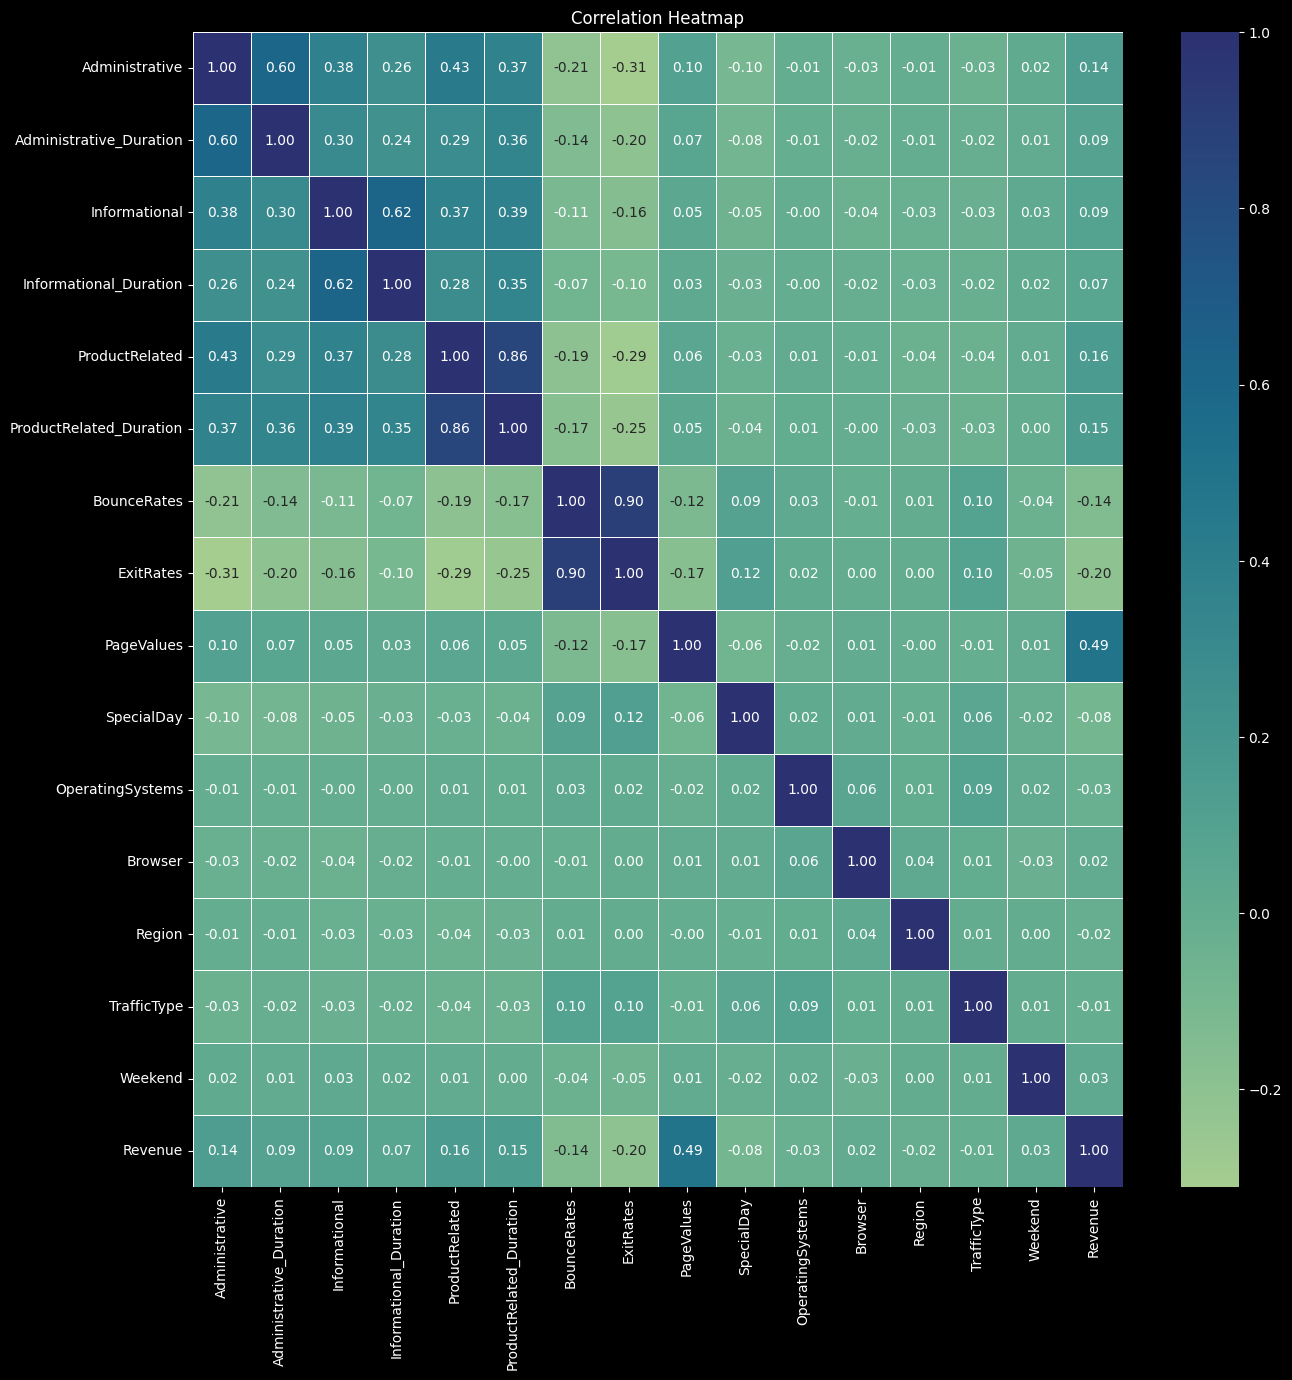

In [149]:
correlation_matrix = data_corr_df.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# What is the average number of pages visited per session?


In [11]:
sum_df= pd.DataFrame()
sum_df['sum'] = data[['Administrative', 'Informational', 'ProductRelated']].sum(axis=1)
display(sum_df)

,sum
0,1
1,2
2,1
3,2
4,10
...,...
12325,56
12326,5
12327,6
12328,19


In [12]:
sum_df.describe()

,sum
count,12205.000000
mean,34.893240
std,46.627336
min,0.000000
25%,9.000000
50%,20.000000
75%,42.000000
max,746.000000


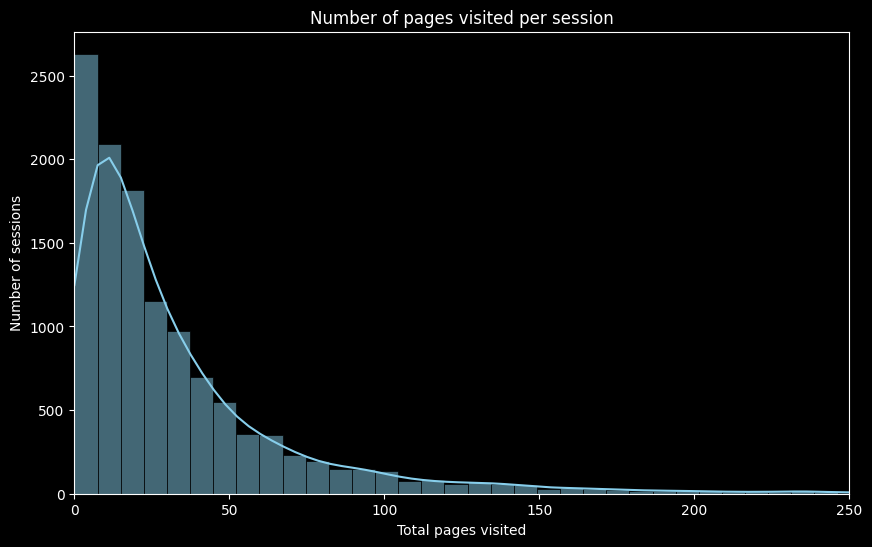

In [127]:
plt.figure(figsize=(10, 6))
sns.histplot(sum_df['sum'], bins=100, kde='True', color='skyblue', edgecolor='black')
plt.title('Number of pages visited per session')
plt.xlabel('Total pages visited')
plt.ylabel('Number of sessions')
x_limits = (0, 250)  # Adjust the limits as needed
plt.xlim(x_limits)

# Display the plot
plt.xticks()
plt.show()

# What is the relationship between the time spent on product related pages and a purchase being made?

In [14]:
data['ProductRelated_Duration'].describe()

count    12205.000000
mean      1206.982457
std       1919.601400
min          0.000000
25%        193.000000
50%        608.942857
75%       1477.154762
max      63973.522230
Name: ProductRelated_Duration, dtype: float64

C:\Users\Omar\AppData\Local\Temp\ipykernel_30044\837202679.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_positive['Duration_Bin'] = pd.cut(revenue_positive['ProductRelated_Duration'], bins=300,  right=False)


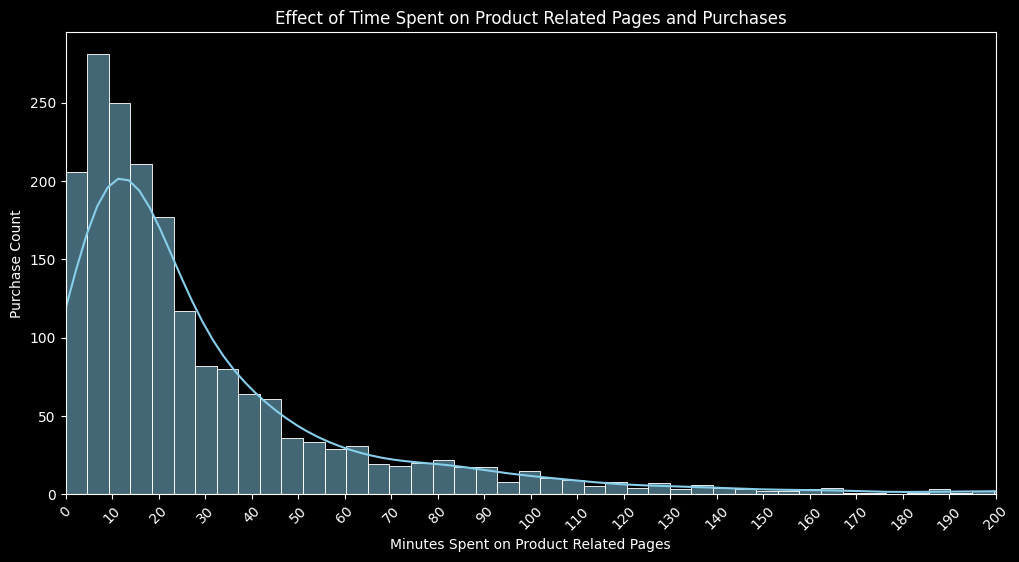

In [88]:
revenue_positive = data[data['Revenue'] == 1]

# Apply binning to the ProductRelated_Duration column
revenue_positive['Duration_Bin'] = pd.cut(revenue_positive['ProductRelated_Duration'], bins=300,  right=False)

# Plotting a bar chart with KDE
plt.figure(figsize=(12, 6))
sns.histplot(revenue_positive['ProductRelated_Duration']/60, kde=True, color='skyblue')
x_limits = (0, 200)  # Adjust the limits as needed
plt.xlim(x_limits)

# Customize the plot
plt.title('Effect of Time Spent on Product Related Pages and Purchases')
plt.xlabel('Minutes Spent on Product Related Pages')
plt.ylabel('Purchase Count')
plt.xticks(rotation=45, ticks=range(0, 210, 10))  # Adjust the range and rotation angle as needed
plt.show()

C:\Users\Omar\AppData\Local\Temp\ipykernel_30044\2236472353.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_positive['Duration_Bin'] = pd.cut(revenue_positive['ProductRelated'], bins=bins,  right=False)


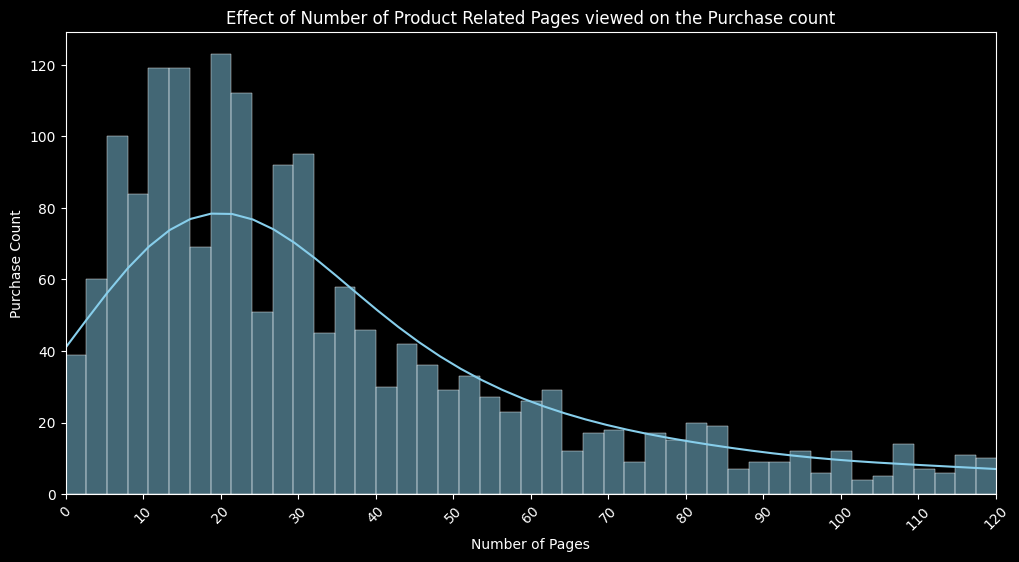

In [77]:
revenue_positive = data[data['Revenue'] == 1]

# Apply binning to the ProductRelated_Duration column
revenue_positive['Duration_Bin'] = pd.cut(revenue_positive['ProductRelated'], bins=bins,  right=False)

# Plotting a bar chart with KDE
plt.figure(figsize=(12, 6))
sns.histplot(revenue_positive['ProductRelated'], bins=200, kde=True, color='skyblue')
x_limits = (0, 120)  # Adjust the limits as needed
plt.xlim(x_limits)

# Customize the plot
plt.title('Effect of Number of Product Related Pages viewed on the Purchase count')
plt.xlabel('Number of Pages')
plt.ylabel('Purchase Count')
plt.xticks(rotation=45, ticks=range(0, 130, 10))  # Adjust the range and rotation angle as needed
plt.show()

# Do sessions closer to special days have a higher likelihood of ending in a transaction?

In [22]:
purchases_df = data[data['Revenue']==1].copy()
purchases_df['SpecialDay'].value_counts()

SpecialDay
0.0    1831
0.6      29
0.2      14
0.4      13
0.8      11
1.0      10
Name: count, dtype: int64

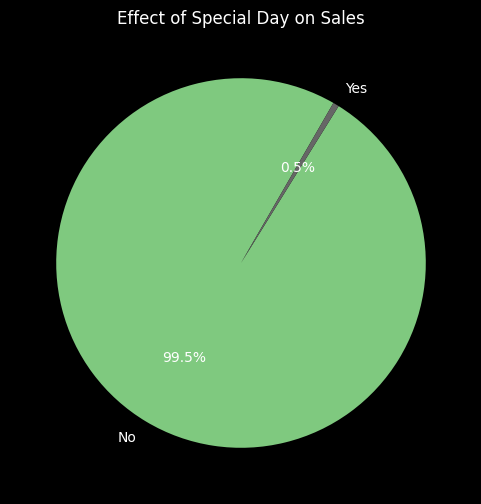

In [113]:
purchases_df['SpecialDayBool'] = purchases_df['SpecialDay'].apply(lambda x: 'Yes' if x == 1 else 'No')

# Plot a pie chart for the "SpecialDayBool" column
plt.figure(figsize=(6,6))
purchases_df['SpecialDayBool'].value_counts().plot.pie(autopct='%1.1f%%', startangle=60, colormap='Accent')
plt.title('Effect of Special Day on Sales')
plt.ylabel('')  # Remove y-axis label
plt.show()

# How does user behavior vary across different months?


C:\Users\Omar\AppData\Local\Temp\ipykernel_30044\2327859941.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_count = data.groupby('Month')['Revenue'].sum()
C:\Users\Omar\AppData\Local\Temp\ipykernel_30044\2327859941.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  returning_visitor = returning_visitor_df.groupby('Month')['Revenue'].sum()
C:\Users\Omar\AppData\Local\Temp\ipykernel_30044\2327859941.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the f

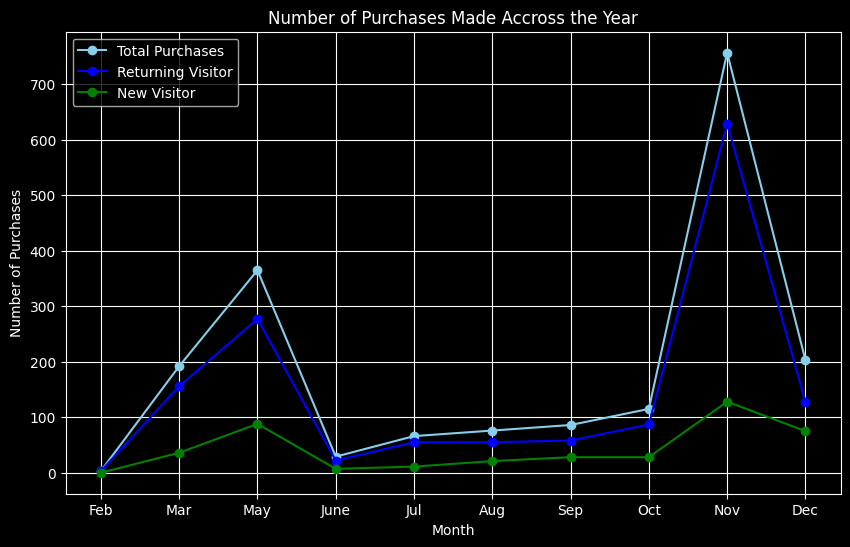

In [141]:
month_order = ['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
data['Month'] = pd.Categorical(data['Month'], categories=month_order, ordered=True)

returning_visitor_df = data[data['VisitorType']== 'Returning_Visitor']
new_visitor_df = data[data['VisitorType'] == 'New_Visitor']

revenue_count = data.groupby('Month')['Revenue'].sum()
returning_visitor = returning_visitor_df.groupby('Month')['Revenue'].sum()
new_visitor = new_visitor_df.groupby('Month')['Revenue'].sum() 

plt.figure(figsize=(10, 6))  

plt.plot(revenue_count.index, revenue_count, label='Total Purchases', marker='o', linestyle='-', color='skyblue')
plt.plot(returning_visitor.index, returning_visitor, label='Returning Visitor', marker='o', linestyle='-', color='b')
plt.plot(new_visitor.index, new_visitor, label ='New Visitor', marker='o', linestyle='-', color='g')

plt.title('Number of Purchases Made Accross the Year')
plt.xlabel('Month')
plt.ylabel('Number of Purchases')
plt.legend()
plt.grid(True)
plt.show()

# How does user behavior differ between returning visitors and new visitors?
- time spent on the website? (sum of all pages)
- relationship between new visitors and time of year

C:\Users\Omar\AppData\Local\Temp\ipykernel_30044\3328322872.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  page_durations = data.groupby('Month')[['Informational_Duration', 'Administrative_Duration', 'ProductRelated_Duration']].sum().sum(axis=1)/60/60
C:\Users\Omar\AppData\Local\Temp\ipykernel_30044\3328322872.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  returning_visitor_duration = returning_visitor_df.groupby('Month')[['Informational_Duration', 'Administrative_Duration', 'ProductRelated_Duration']].sum().sum(axis=1)/60/60
C:\Users\Omar\AppData\Local\Temp\ipykernel_30044\3328322872.py:6: FutureWa

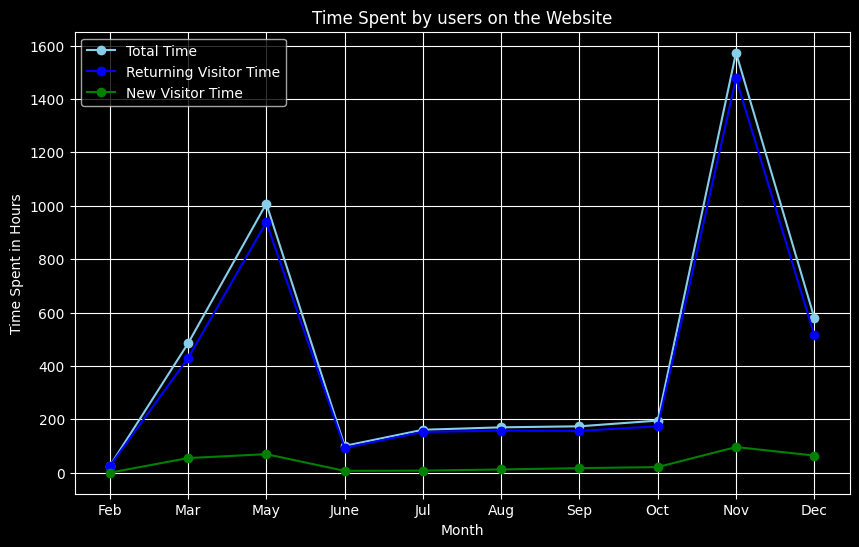

In [142]:
returning_visitor_df = data[data['VisitorType']== 'Returning_Visitor']
new_visitor_df = data[data['VisitorType'] == 'New_Visitor']

page_durations = data.groupby('Month')[['Informational_Duration', 'Administrative_Duration', 'ProductRelated_Duration']].sum().sum(axis=1)/60/60
returning_visitor_duration = returning_visitor_df.groupby('Month')[['Informational_Duration', 'Administrative_Duration', 'ProductRelated_Duration']].sum().sum(axis=1)/60/60
new_visitor_duration = new_visitor_df.groupby('Month')[['Informational_Duration', 'Administrative_Duration', 'ProductRelated_Duration']].sum().sum(axis=1)/60/60

plt.figure(figsize=(10, 6))  

plt.plot(page_durations.index, page_durations, label='Total Time', marker='o', linestyle='-', color='skyblue')
plt.plot(returning_visitor_duration.index, returning_visitor_duration, label='Returning Visitor Time', marker='o', linestyle='-', color='b')
plt.plot(new_visitor_duration.index, new_visitor_duration, label ='New Visitor Time', marker='o', linestyle='-', color='g')

plt.title('Time Spent by users on the Website')
plt.xlabel('Month')
plt.ylabel('Time Spent in Hours')
plt.legend()
plt.grid(True)
plt.show()

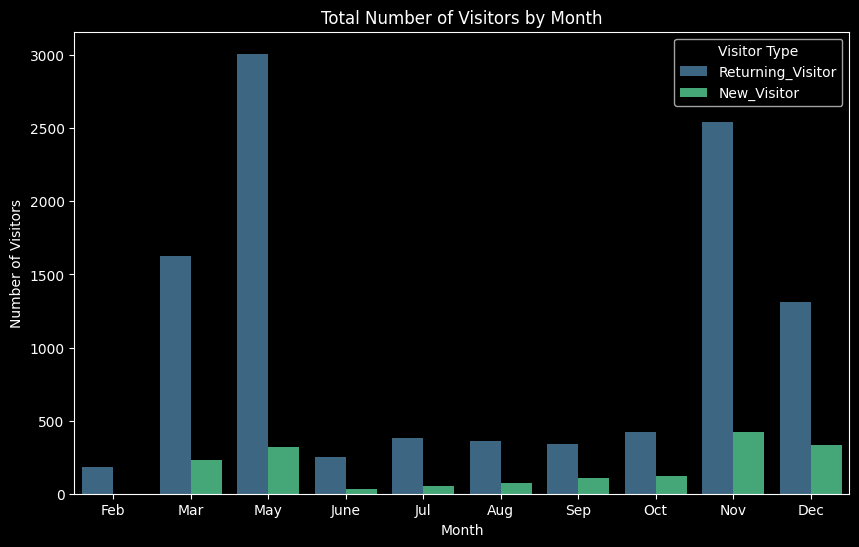

In [81]:
plt.figure(figsize=(10, 6))

data = data[data['VisitorType']!= 'Other']
sns.countplot(x='Month', hue='VisitorType', data=data, palette='viridis')

# Customize the plot
plt.title('Total Number of Visitors by Month')
plt.xlabel('Month')
plt.ylabel('Number of Visitors')
plt.legend(title='Visitor Type')

# Show the plot
plt.show()


# Weekend vs Weekday

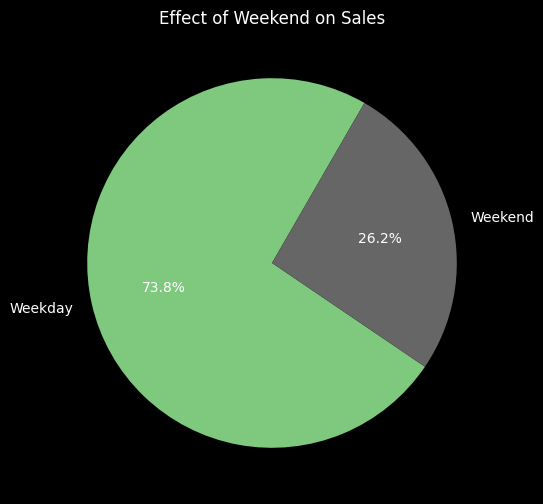

In [118]:
purchases_df['weekend'] = purchases_df['Weekend'].apply(lambda x: 'Weekend' if x == True else 'Weekday')

# Plot a pie chart for the "Weekend" column
plt.figure(figsize=(6,6))
purchases_df['weekend'].value_counts().plot.pie(autopct='%1.1f%%', startangle=60, colormap='Accent')
plt.title('Effect of Weekend on Sales')
plt.ylabel('')  
plt.show()

# What is the overall conversion rate (percentage of sessions ending in a transaction)?

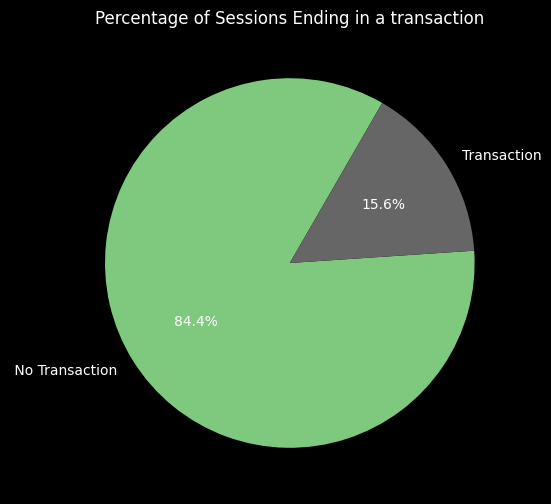

In [136]:
# Plot a pie chart for number of sessions resulting in a transaction
plt.figure(figsize=(6,6))

labels = [' No Transaction' , 'Transaction']
data['Revenue'].value_counts().plot.pie(labels= labels, autopct='%1.1f%%', startangle=60, colormap='Accent')
plt.title('Percentage of Sessions Ending in a transaction')
plt.ylabel('')  
plt.show()

# What is the Relationship between Bounce Rates and Exit Rates?

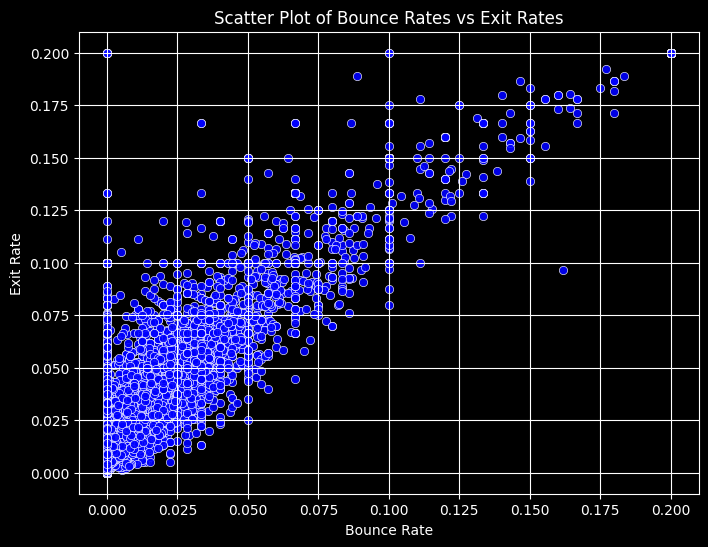

In [140]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BounceRates', y='ExitRates', data=df, color='blue', alpha=0.9)

# Customize the plot
plt.title('Scatter Plot of Bounce Rates vs Exit Rates')
plt.xlabel('Bounce Rate')
plt.ylabel('Exit Rate')
plt.grid(True)

# Show the plot
plt.show()

# Go in depth into the page values

In [ ]:
# possibly calculate the total page values and see how that relates to a purchase being made
# Plot page values against revenue
# plot bounce/exit rates against revenue

In [155]:
bounce_df = data[data['BounceRates'] != 0]

bounce_exit_df = data[(data['BounceRates']==data['ExitRates'])]
bounce_exit_df.head(50)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Duration_Bin
0,0,0.0,0,0.0,1,0.00,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,0-200
2,0,0.0,0,0.0,1,0.00,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,0-200
6,0,0.0,0,0.0,1,0.00,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False,0-200
7,1,0.0,0,0.0,0,0.00,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False,0-200
16,0,0.0,0,0.0,1,0.00,0.200000,0.200000,0.0,0.0,Feb,1,1,4,3,Returning_Visitor,False,False,0-200
21,0,0.0,0,0.0,2,0.00,0.200000,0.200000,0.0,0.0,Feb,3,3,1,3,Returning_Visitor,False,False,0-200
24,0,0.0,0,0.0,1,0.00,0.200000,0.200000,0.0,0.0,Feb,2,2,4,1,Returning_Visitor,True,False,0-200
49,0,0.0,0,0.0,1,0.00,0.200000,0.200000,0.0,0.6,Feb,2,2,3,2,Returning_Visitor,False,False,0-200
50,0,0.0,0,0.0,1,0.00,0.200000,0.200000,0.0,0.0,Feb,1,1,3,4,Returning_Visitor,True,False,0-200
55,0,0.0,0,0.0,1,0.00,0.200000,0.200000,0.0,0.2,Feb,2,4,1,3,Returning_Visitor,False,False,0-200


In [ ]:
# Find recommendations to improve the website
# check for other statistics available online to make your presentation more well rounded
# check other datasets for more insights
# check if there is a possibility of creating a recommender for the products that you have